In [1]:
!pip install sentence-transformers

     |████████████████████████████████| 71kB 2.1MB/s 
     |████████████████████████████████| 890kB 8.0MB/s 
     |████████████████████████████████| 1.1MB 40.7MB/s 
     |████████████████████████████████| 890kB 43.4MB/s 
     |████████████████████████████████| 3.0MB 40.5MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-0.3.6-cp36-none-any.whl size=101182 sha256=e54627bdd6071c3c09398cb1e99a5e08ff9066aacb3869a4075fdeac6c69f9cd
  Stored in directory: /root/.cache/pip/wheels/6f/3f/75/c0c4b3ef5dfbf8806d37b8dc661861772aba2f7aa419c85a9b
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=c1d192cede88018a0d86ed21607faa2a1173b2386f6e6f7e9bb21c94180ab875
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sentence-transformers sacremoses


In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

100%|██████████| 245M/245M [00:24<00:00, 10.1MB/s]


In [10]:
sentences = [
             'I got 4004 rank in AEEE, can I get ECE?',
             'Sentences are passed as a list of string.', 
             'The quick brown fox jumps over the lazy dog.',
             "I got 26570 rank in AEEE, will I get ECE?",
             'I have 2000 rank in AEE 2019, can I get CSE ?',
             ]

#Sentences are encoded by calling model.encode()
sentence_embeddings = model.encode(sentences)


print(sentence_embeddings.shape)

(5, 768)


In [11]:
import numpy as np
from sentence_transformers import SentenceTransformer, util
from tqdm import tqdm

In [12]:
vector_space_distances = np.zeros([len(sentences), len(sentences)])

In [13]:


for m in range(len(sentence_embeddings)):
    main = sentence_embeddings[m]
    for n in range(len(sentence_embeddings)):
        vector_space_distances[m][n] =  util.pytorch_cos_sim(main, sentence_embeddings[n])

In [14]:
vector_space_distances

array([[ 0.99999988,  0.1004371 , -0.01768294,  0.51100433,  0.44306341],
       [ 0.1004371 ,  0.99999994,  0.07961069,  0.08955346,  0.04842606],
       [-0.01768294,  0.07961069,  1.00000048, -0.04306906,  0.09801605],
       [ 0.51100433,  0.08955346, -0.04306906,  0.99999976,  0.41028148],
       [ 0.44306341,  0.04842606,  0.09801605,  0.41028148,  1.00000024]])

In [15]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10


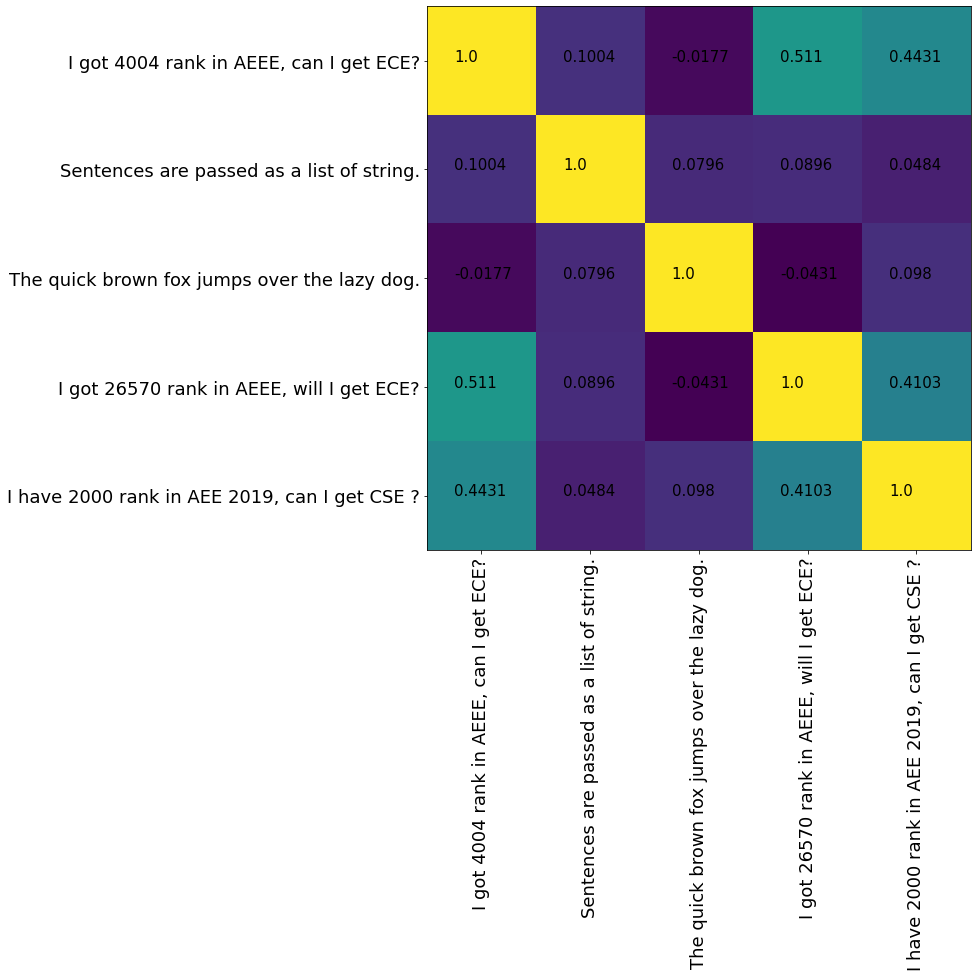

In [16]:
my_xticks = sentences
plt.xticks(np.arange(0,len(sentences)), my_xticks, fontsize = 18)
plt.yticks(np.arange(0,len(sentences)), my_xticks, fontsize = 18)

plt.xticks(rotation=90)
plt.imshow(vector_space_distances)

for m in range(len(vector_space_distances)):
    for n in range(len(vector_space_distances[n])):
        plt.text(m - 0.25 ,n, str(round(vector_space_distances[m][n], 4)), fontsize = 15)

In [17]:
!cp /content/drive/"My Drive"/mission_quora/train.csv.zip /content/

In [18]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [19]:
import pandas as pd

In [20]:
df = pd.read_csv("train.csv")

In [29]:
def generate_similarity_matrix(question_list):
    sentence_embeddings = model.encode(question_list)
    vector_space_distances = np.zeros([len(question_list), len(question_list)])
    sentence_embeddings = model.encode(question_list)

    vector_space_distances = np.zeros([len(question_list), len(question_list)])

    

    for m in range(len(sentence_embeddings)):
        main = sentence_embeddings[m]
        for n in range(len(sentence_embeddings)):

            similarity_factor = util.pytorch_cos_sim(main, sentence_embeddings[n])
            vector_space_distances[m][n] = similarity_factor
    return vector_space_distances

In [30]:
raw_questions = df.question1.head(100).values

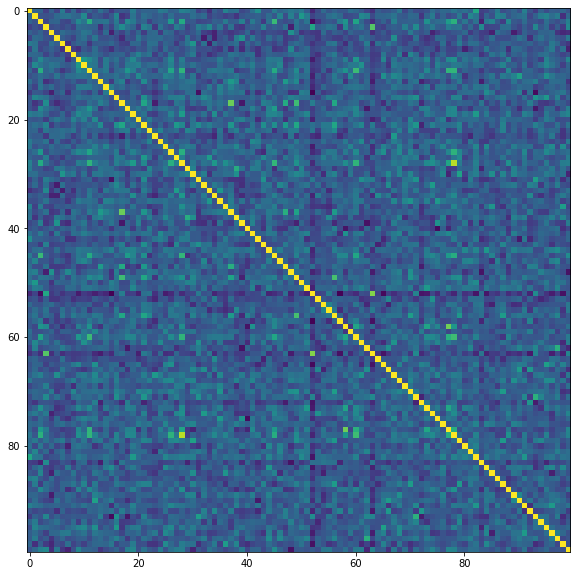

In [31]:
plt.imshow(generate_similarity_matrix(raw_questions))

In [32]:
def find_similar_questions(question_list):
    sentence_embeddings = model.encode(question_list)
    vector_space_distances = np.zeros([len(question_list), len(question_list)])
    sentence_embeddings = model.encode(question_list)

    vector_space_distances = np.zeros([len(question_list), len(question_list)])

    
    clusters = [[question_list[i]] for i in range(len(question_list))]

    similar_questions = []

    for m in tqdm(range(len(sentence_embeddings))):
        main = sentence_embeddings[m]
        for n in range(m):

            similarity_factor = util.pytorch_cos_sim(main, sentence_embeddings[n])

            if similarity_factor > 0.8 and m != n:
                
                similar_questions.append([question_list[m], question_list[n]])
                clusters[m].append(question_list[n])

    return pd.DataFrame(similar_questions, columns = ["q1", "q2"]), clusters

In [33]:
df.question1.values

array(['What is the step by step guide to invest in share market in india?',
       'What is the story of Kohinoor (Koh-i-Noor) Diamond?',
       'How can I increase the speed of my internet connection while using a VPN?',
       ..., 'What is one coin?',
       'What is the approx annual cost of living while studying in UIC Chicago, for an Indian student?',
       'What is like to have sex with cousin?'], dtype=object)

In [38]:
all_questions = df.question1.head(300).values

In [39]:
pairs, clusters = find_similar_questions(all_questions)

100%|██████████| 300/300 [00:06<00:00, 45.43it/s]


In [40]:
chunks = []

for i in clusters:
    if len(i) != 1:
        chunks.append(i)

In [41]:
chunks[:5]

[['How can I make money through the Internet?',
  'What is best way to make money online?'],
 ['Why do Slavs squat?', 'Why do Slavs squat?'],
 ['How can I make money online with free of cost?',
  'How can I make money through the Internet?']]